In [18]:
import pandas as pd

In [19]:
nbp = pd.read_csv("nbp.csv")
peg = pd.read_csv("peg.csv")
the = pd.read_csv("the.csv")
ttf = pd.read_csv("ttf.csv")
ztp = pd.read_csv("ztp.csv")

In [20]:
nbp.head()

,Date,HIGH,LOW,OPEN,CLOSE,VOLUME,ticker
0,2010-01-04,37.90,35.50,37.00,35.57,5795.0,NGLNMc1
1,2010-01-05,37.60,36.25,36.25,37.38,5005.0,NGLNMc1
2,2010-01-06,37.25,36.15,36.81,37.00,7630.0,NGLNMc1
3,2010-01-07,39.00,36.60,37.00,37.27,10130.0,NGLNMc1
4,2010-01-08,36.25,35.10,36.00,35.22,8245.0,NGLNMc1


In [21]:
gbpeur = pd.read_csv("gbpeur.csv")

In [23]:
hubs = [nbp, peg, the, ttf, ztp, gbpeur]

In [24]:
for hub in hubs:
    hub["Date"] = pd.to_datetime(hub["Date"])
    hub.set_index("Date", inplace=True)

In [11]:
nbp.tail()

,HIGH,LOW,OPEN,CLOSE,VOLUME,ticker
Date,,,,,,
2024-08-23,90.01,86.59,88.19,88.63,7185.0,NGLNMc1
2024-08-27,94.15,89.54,90.00,93.25,9620.0,NGLNMc1
2024-08-28,95.37,92.49,92.93,92.79,15685.0,NGLNMc1
2024-08-29,93.79,90.85,93.34,91.73,5980.0,NGLNMc1
2024-08-30,97.55,93.67,94.65,96.15,7110.0,NGLNMc1


In [12]:
ttf.tail()

,HIGH,LOW,OPEN,CLOSE,VOLUME,ticker
Date,,,,,,
2024-08-26,37.920,36.135,36.845,37.656,31852.0,TFMBMc1
2024-08-27,39.045,37.285,37.995,38.689,81747.0,TFMBMc1
2024-08-28,39.580,38.300,38.555,38.520,81003.0,TFMBMc1
2024-08-29,39.040,37.915,38.420,38.601,46400.0,TFMBMc1
2024-08-30,40.325,38.750,39.170,39.823,80076.0,TFMBMc1


In [28]:
import numpy as np
min_dates = []

for hub in hubs:
    min_dates.append(np.min(hub.index.to_list()))

In [29]:
min_dates

[Timestamp('2010-01-04 00:00:00'),
 Timestamp('2018-09-28 00:00:00'),
 Timestamp('2015-01-02 00:00:00'),
 Timestamp('2010-03-12 00:00:00'),
 Timestamp('2014-11-28 00:00:00'),
 Timestamp('2010-01-01 00:00:00')]

In [37]:
for idx, hub in enumerate(hubs):
    hubs[idx] = hub[hub.index >= '2018-10-01'].copy()

In [40]:
nbp, peg, the, ttf, ztp, gbpeur = hubs[0], hubs[1], hubs[2], hubs[3], hubs[4], hubs[5]

In [47]:
gbpeur.tail()

,CLOSE,HIGH,LOW,OPEN,COUNT,ticker
Date,,,,,,
2024-08-26,1.1811,1.1833,1.1789,1.1798,19596.0,GBPEUR=
2024-08-27,1.1850,1.1859,1.1805,1.1807,20530.0,GBPEUR=
2024-08-28,1.1862,1.1890,1.1832,1.1844,22115.0,GBPEUR=
2024-08-29,1.1882,1.1900,1.1856,1.1859,22926.0,GBPEUR=
2024-08-30,1.1874,1.1904,1.1856,1.1880,21146.0,GBPEUR=


In [50]:
nbp_eur_mwh = nbp.copy()

In [51]:
nbp_eur_mwh[['CLOSE']] = nbp_eur_mwh[['CLOSE']]  * gbpeur[['CLOSE']]  /(2.9307)

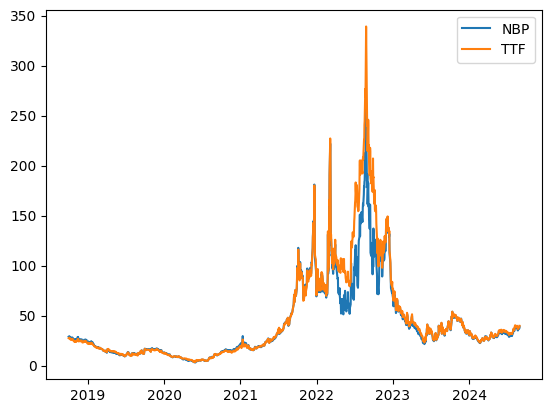

In [57]:
import matplotlib.pyplot as plt

plt.plot(nbp_eur_mwh.index, nbp_eur_mwh[['CLOSE']], label = "NBP")

plt.plot(ttf.index, ttf[['CLOSE']], label = "TTF")
plt.legend()
plt.show()

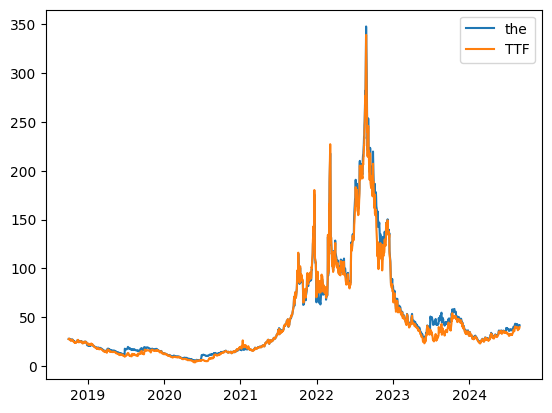

In [59]:
import matplotlib.pyplot as plt

plt.plot(the.index, the[['CLOSE']], label = "the")

plt.plot(ttf.index, ttf[['CLOSE']], label = "TTF")
plt.legend()
plt.show()